## Importing Libraries

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import sys
print(sys.executable)


c:\Users\saura\anaconda3\envs\tensorflow_env\python.exe


### Loading Model

In [6]:
model  = tf.keras.models.load_model('trained_model.keras')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

In [8]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


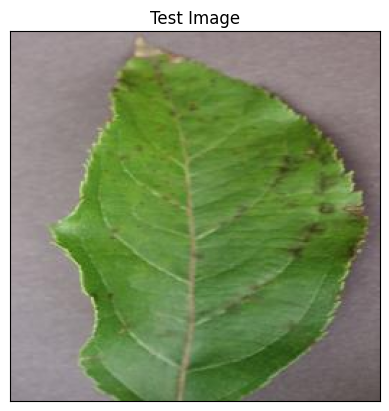

In [9]:
import cv2
image_path = "test/test/AppleScab1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [11]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 6s 6s/step


(array([[9.9324530e-01, 4.3351173e-07, 1.4789701e-04, 7.2720159e-06,
         2.3995648e-07, 2.9050207e-06, 1.6299441e-07, 4.1259165e-05,
         3.8630112e-08, 1.5862282e-06, 2.1816547e-08, 2.5905740e-06,
         7.9727059e-08, 2.4229316e-06, 2.4352306e-04, 6.9101607e-06,
         4.3341397e-06, 1.8089931e-08, 2.1954351e-07, 2.7962511e-07,
         2.9582545e-06, 5.2432420e-05, 6.3357220e-06, 1.1899542e-06,
         1.8137862e-07, 5.9518805e-03, 1.0009560e-04, 3.3034526e-06,
         2.1301596e-06, 2.8882059e-06, 2.2079967e-06, 3.6576088e-07,
         1.6446023e-04, 8.0281559e-09, 3.9900861e-08, 6.0749505e-07,
         2.2309969e-09, 1.3252952e-06]], dtype=float32),
 (1, 38))

In [12]:
result_index = np.argmax(prediction)
result_index

0

In [13]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

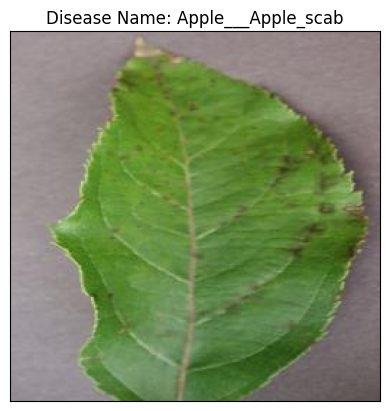

In [14]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
model_prediction

'Apple___Apple_scab'